In [4]:
import warnings

warnings.filterwarnings("ignore")

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
#!pip install --user mlxtend
from mlxtend.frequent_patterns import apriori,association_rules
from mlxtend.preprocessing import TransactionEncoder

In [5]:
data = pd.read_csv("D:\YUKTA\Assignment\DS\Association Rules\Online retail.csv")

In [6]:
data

,Transactions
0,"shrimp,almonds,avocado,vegetables mix,green gr..."
1,"burgers,meatballs,eggs"
2,chutney
3,"turkey,avocado"
4,"mineral water,milk,energy bar,whole wheat rice..."
...,...
7496,"butter,light mayo,fresh bread"
7497,"burgers,frozen vegetables,eggs,french fries,ma..."
7498,chicken
7499,"escalope,green tea"


In [7]:
data.shape

(7501, 1)

In [8]:
data.head(10)

,Transactions
0,"shrimp,almonds,avocado,vegetables mix,green gr..."
1,"burgers,meatballs,eggs"
2,chutney
3,"turkey,avocado"
4,"mineral water,milk,energy bar,whole wheat rice..."
5,low fat yogurt
6,"whole wheat pasta,french fries"
7,"soup,light cream,shallot"
8,"frozen vegetables,spaghetti,green tea"
9,french fries


# Visualizations:

**Barplot to show Top 20 items sold most of the time:**

In [10]:
from collections import Counter

In [11]:
# Split each transaction into a list of items
items = [item.strip() for transaction in data['Transactions'] for item in transaction.split(',')]

# Count the frequency of each item
item_counts = Counter(items)

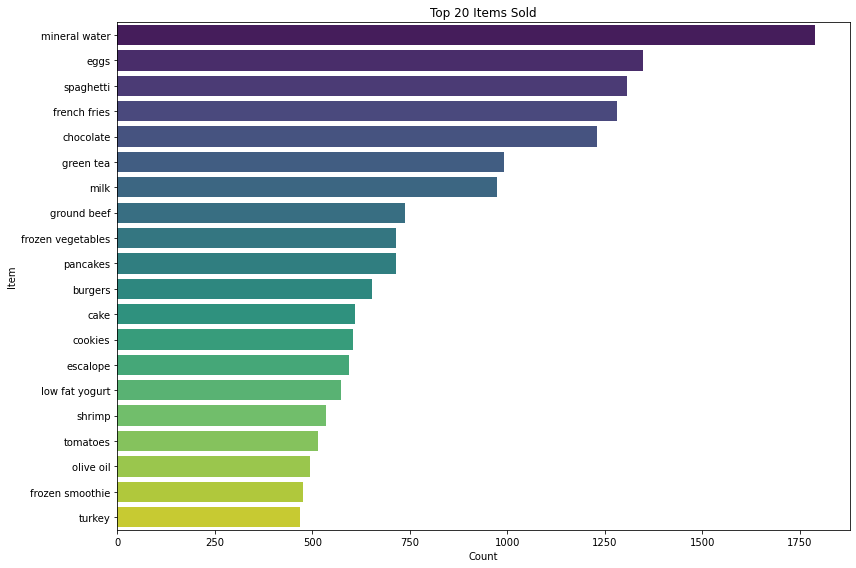

In [12]:
df = pd.DataFrame(list(item_counts.items()), columns=['Item', 'Count'])
df = df.sort_values(by='Count', ascending=False)

# Plotting using seaborn
plt.figure(figsize=(12,8))
sns.barplot(x='Count', y='Item', data=df.head(20), palette='viridis')
plt.xlabel('Count')
plt.ylabel('Item')
plt.title('Top 20 Items Sold')
plt.tight_layout()
plt.show()

As we could se from the above graph Mineral Water is the most sold item.

**Piechart:**

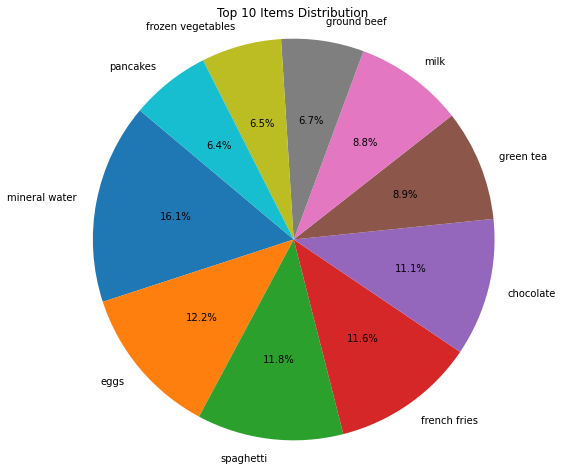

In [13]:
plt.figure(figsize=(8, 8))
plt.pie(df['Count'].head(10), labels=df['Item'].head(10), autopct='%1.1f%%', startangle=140)
plt.title('Top 10 Items Distribution')
plt.axis('equal')
plt.show()

# Data Pre-processing:

In [14]:
df = list(data["Transactions"].apply(lambda x:x.split(",") ))

Transforming the list with one-hot encoding:

In [15]:
a = TransactionEncoder()

In [16]:
a_data = a.fit(df).transform(df)

In [17]:
df = pd.DataFrame(a_data,columns=a.columns_)
df = df.replace(False,0)
df = df.replace(True,1)

In [18]:
df

,asparagus,almonds,antioxydant juice,asparagus,avocado,babies food,bacon,barbecue sauce,black tea,blueberries,...,turkey,vegetables mix,water spray,white wine,whole weat flour,whole wheat pasta,whole wheat rice,yams,yogurt cake,zucchini
0,0,1,1,0,1,0,0,0,0,0,...,0,1,0,0,1,0,0,1,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,1,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7496,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
7497,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
7498,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
7499,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


Products that customers bought or did not buy during shopping will are represented by values 1 and 0 respectively.

# Apriori Algorithm

In [19]:
df_apriori = apriori(df, min_support = 0.05, use_colnames = True)
df_apriori

,support,itemsets
0,0.087188,(burgers)
1,0.081056,(cake)
2,0.059992,(chicken)
3,0.163845,(chocolate)
4,0.080389,(cookies)
5,0.051060,(cooking oil)
6,0.179709,(eggs)
7,0.079323,(escalope)
8,0.170911,(french fries)
9,0.063325,(frozen smoothie)


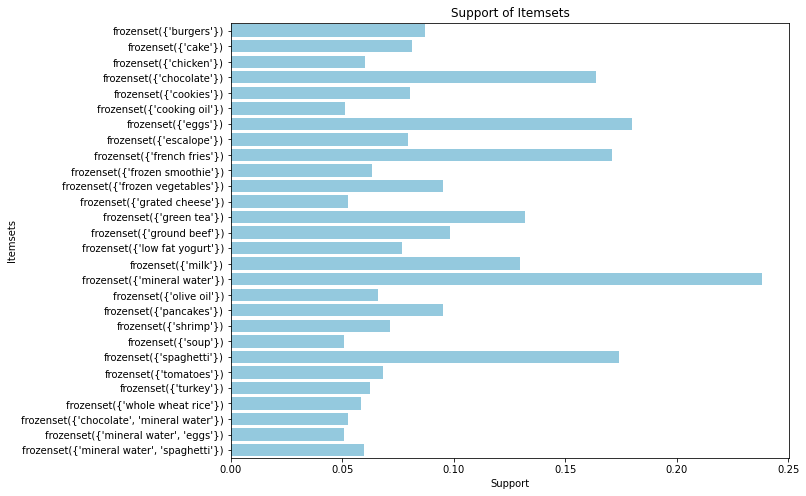

In [20]:
plt.figure(figsize=(10, 8))
sns.barplot(x='support', y='itemsets', data=df_apriori, color='skyblue')
plt.xlabel('Support')
plt.ylabel('Itemsets')
plt.title('Support of Itemsets')
plt.show()

# Conclusion:

From the above table we can se that **Mineral Water** is the most frequently purchased item with a support of 0.2383.

It indicates that approximately 23.84% of transactions include mineral water.

**Eggs** and **French Fries** are also highly popular, with supports of 0.179709 and 0.170911, respectively.

**Spaghetti** and **Chocolate** follow closely, with supports of 0.174110 and 0.163845, respectively.

Items like **Soup (0.050527)**, **Cooking Oil (0.051060)**, and **Grated Cheese (0.052393)** are among the less frequently purchased items, each appearing in just over 5% of transactions.

# Association Rules

In [21]:
rules = association_rules(df_apriori, metric="lift", min_threshold=0.5)

In [22]:
rules

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction,zhangs_metric
0,(chocolate),(mineral water),0.163845,0.238368,0.052660,0.321400,1.348332,0.013604,1.122357,0.308965
1,(mineral water),(chocolate),0.238368,0.163845,0.052660,0.220917,1.348332,0.013604,1.073256,0.339197
2,(mineral water),(eggs),0.238368,0.179709,0.050927,0.213647,1.188845,0.008090,1.043158,0.208562
3,(eggs),(mineral water),0.179709,0.238368,0.050927,0.283383,1.188845,0.008090,1.062815,0.193648
4,(mineral water),(spaghetti),0.238368,0.174110,0.059725,0.250559,1.439085,0.018223,1.102008,0.400606
5,(spaghetti),(mineral water),0.174110,0.238368,0.059725,0.343032,1.439085,0.018223,1.159314,0.369437


In [23]:
rules.sort_values('lift',ascending = False).head(10)

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction,zhangs_metric
4,(mineral water),(spaghetti),0.238368,0.174110,0.059725,0.250559,1.439085,0.018223,1.102008,0.400606
5,(spaghetti),(mineral water),0.174110,0.238368,0.059725,0.343032,1.439085,0.018223,1.159314,0.369437
0,(chocolate),(mineral water),0.163845,0.238368,0.052660,0.321400,1.348332,0.013604,1.122357,0.308965
1,(mineral water),(chocolate),0.238368,0.163845,0.052660,0.220917,1.348332,0.013604,1.073256,0.339197
2,(mineral water),(eggs),0.238368,0.179709,0.050927,0.213647,1.188845,0.008090,1.043158,0.208562
3,(eggs),(mineral water),0.179709,0.238368,0.050927,0.283383,1.188845,0.008090,1.062815,0.193648


# Conclusion:

There is a strong association between Chocolate and Mineral Water.

The rule **(chocolate -> mineral water)** has a confidence of 32.14% and a lift of 1.35. 

This indicates that customers who buy chocolate are 32.14% likely to also buy mineral water.

The rule **(mineral water -> eggs)** has a confidence of 21.36% and a lift of 1.19.

While the association is not as strong as the chocolate and mineral water combination, it still indicates that customers who buy mineral water are 1.19 times more likely to also buy eggs than expected by chance.

There is also a strong association between Mineral Water and Spaghetti.

The rule **(mineral water -> spaghetti)** has a confidence of 25.06% and a lift of 1.44, indicating a significant association.

Thus showing that customers buying mineral water are 1.44 times more likely to buy spaghetti compared to random chance.